# Data Processing

In [1]:
# This kernel predicts the housing price in Kaggle competition 
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read in the training data
df_train = pd.read_csv('./input/train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Read in the test data
# The training data set has one additional column of independent variable: SalePrice
df_test = pd.read_csv('./input/test.csv')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
# Combine the training and test data set for data processing
# Training data set is when Id <= 1460
df_all = pd.concat([df_train.loc[:,'MSSubClass':'SaleCondition'], df_test.loc[:,'MSSubClass':'SaleCondition']],axis = 0)
df_all

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
# Check the names of the columns
df_all.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
# Analyze the dependent variable SalePrice
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

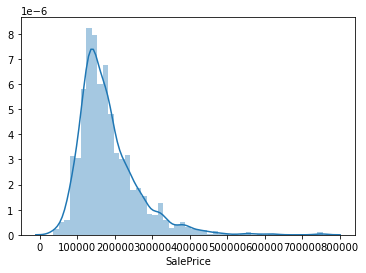

In [7]:
# View the histogram of SalePrice
sns.distplot(df_train['SalePrice'])

In [8]:
# According to the histogram of SalePrice, it has positive skewness and positive kurtosis
# Calculate the skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


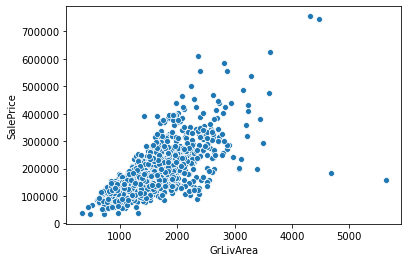

In [9]:
# Scatter plot of some key variables
sns.scatterplot(x = df_train['GrLivArea'], y = df_train['SalePrice'])

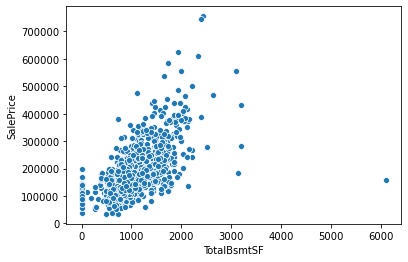

In [10]:
sns.scatterplot(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

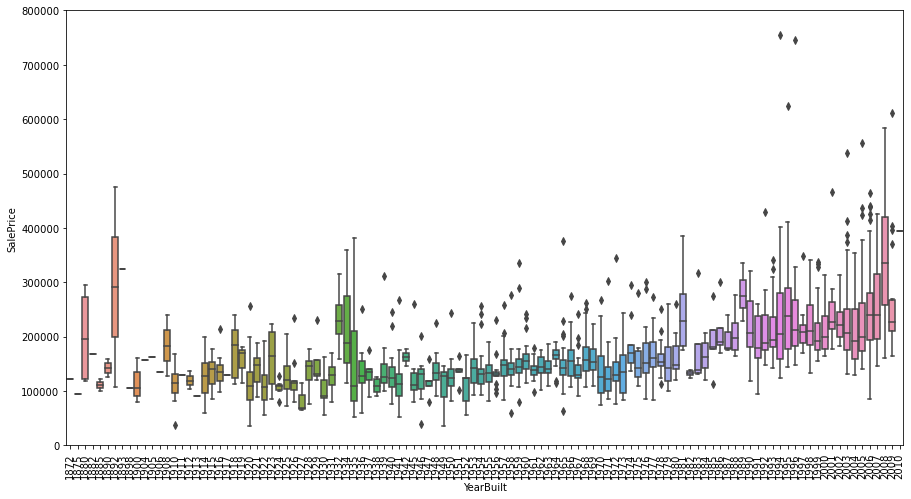

In [11]:
# Boxplot of some categorical variables
plt.subplots(figsize=(15,8))
fig = sns.boxplot(x = df_train['YearBuilt'], y = df_train['SalePrice'])
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation=90)

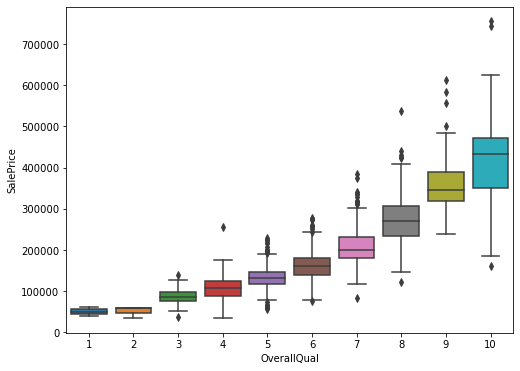

In [12]:
# Boxplot of some of the categorical variables
plt.subplots(figsize=(8, 6))
sns.boxplot(x = df_train['OverallQual'], y = df_train['SalePrice'])

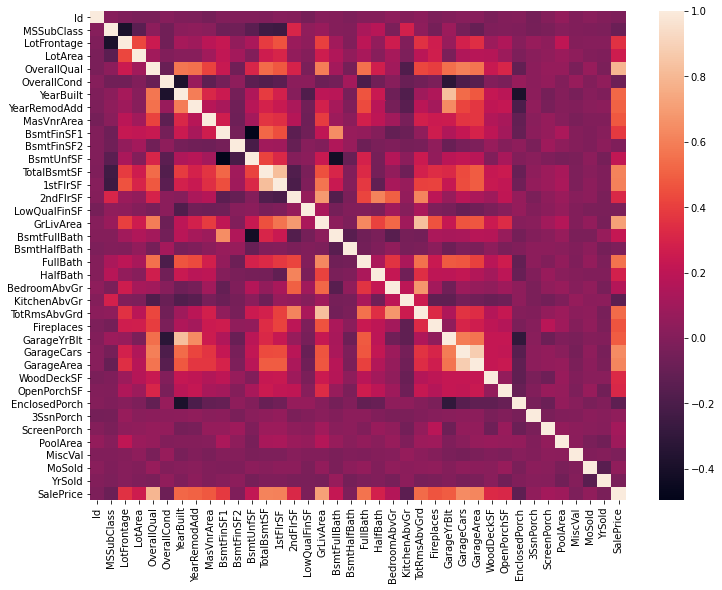

In [13]:
#we can further check the heatmap of the correlation matrix
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)

In [14]:
# Heatmap of the 10 most correlated features with SalePrice
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [15]:
cm = np.corrcoef(df_train[cols].values.T)
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

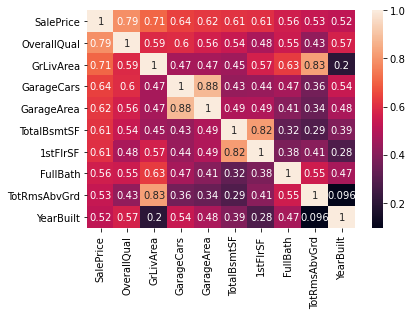

In [16]:
sns.heatmap(cm, yticklabels=cols.values, xticklabels=cols.values, annot=True)

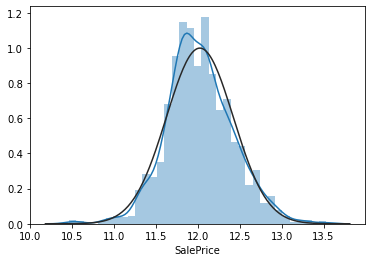

In [17]:
# Applying log transformation to SalePrice as it is not normal
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit=norm)

In [18]:
# Then we want to check missing data for both training and test data set
df_all_na = (df_all.isnull().sum() / len(df_all)) * 100
df_all_na = df_all_na.drop(df_all_na[df_all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_all_na})
missing_data

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

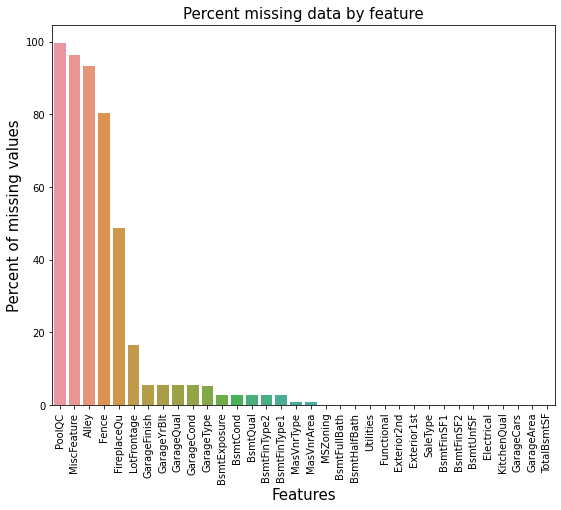

In [19]:
# Plot the percentage of missing by feature
f, ax = plt.subplots(figsize=(9, 7))
plt.xticks(rotation='90')
sns.barplot(x=df_all_na.index, y=df_all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Then we deal with missing values by imputation. 

In [20]:
# PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
df_all["PoolQC"] = df_all["PoolQC"].fillna("None")

In [21]:
# MiscFeature : data description says NA means "no misc feature"
df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")

In [22]:
# Alley : data description says NA means "no alley access"
df_all["Alley"] = df_all["Alley"].fillna("None")

In [23]:
# Fence : data description says NA means "no fence"
df_all["Fence"] = df_all["Fence"].fillna("None")

In [24]:
# FireplaceQu : data description says NA means "no fireplace"
df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna("None")

In [25]:
# LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [26]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_all[col] = df_all[col].fillna('None')

In [27]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_all[col] = df_all[col].fillna(0)

In [28]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_all[col] = df_all[col].fillna(0)

In [29]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_all[col] = df_all[col].fillna('None')

In [30]:
# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
df_all["MasVnrType"] = df_all["MasVnrType"].fillna("None")
df_all["MasVnrArea"] = df_all["MasVnrArea"].fillna(0)

In [31]:
# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])

In [32]:
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df_all = df_all.drop(['Utilities'], axis=1)

In [33]:
# Functional : data description says NA means typical
df_all["Functional"] = df_all["Functional"].fillna("Typ")

In [34]:
# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

In [35]:
# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

In [36]:
# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])

In [37]:
# SaleType : Fill in again with most frequent which is "WD"
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

In [38]:
# Check if there is still any missing data
df_all.isnull().sum().max()

0

Transforming some numerical variables that are actually categorical variables.

In [39]:
#MSSubClass=The building class
for col in ('MSSubClass','OverallCond','MoSold',):
    df_all[col] = df_all[col].astype(str)

Deal with highly skewed variables in the data

In [40]:
from scipy.stats import skew
numeric_feats = df_all.dtypes[df_all.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_all[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


In [41]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_all[feat] = boxcox(df_all[feat], lam)

There are 33 skewed numerical features to Box Cox transform


Label Eoncoding

In [42]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [43]:
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_all[c].values)) 
    df_all[c] = lbl.transform(list(df_all[c].values))

In [44]:
df_all.shape

(2919, 78)

In [45]:
# Transform categorical variables to dummy variables
df_all = pd.get_dummies(df_all)
print(df_all.shape)

(2919, 220)


In [46]:
# Partition the df_all data to df_train2 and df_test2
df_train2 = df_all[: df_train["Id"].max()]
df_train2

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,5.802739,19.211723,1,1,3,0,2.259674,4,14.185966,...,0,0,0,1,0,0,0,0,1,0
1,5,6.197221,19.711793,1,1,3,0,2.055642,7,14.143559,...,0,0,0,1,0,0,0,0,1,0
2,10,5.887419,20.346881,1,1,0,0,2.259674,4,14.182841,...,0,0,0,1,0,0,0,0,1,0
3,11,5.653921,19.691139,1,1,0,0,2.259674,4,14.045907,...,0,0,0,1,1,0,0,0,0,0
4,10,6.291711,21.324865,1,1,0,0,2.440268,4,14.181278,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,10,5.714669,18.960042,1,1,3,0,2.055642,4,14.179714,...,0,0,0,1,0,0,0,0,1,0
1456,5,6.314735,20.994554,1,1,3,0,2.055642,5,14.146717,...,0,0,0,1,0,0,0,0,1,0
1457,11,5.831328,19.475912,1,1,3,0,2.259674,8,14.087847,...,0,0,0,1,0,0,0,0,1,0
1458,5,5.887419,19.759768,1,1,3,0,1.820334,5,14.102254,...,0,0,0,1,0,0,0,0,1,0


In [47]:
df_test2 = df_all[df_train["Id"].max():]
df_test2

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,6.197221,20.479022,1,1,3,0,1.820334,5,14.119786,...,0,0,0,1,0,0,0,0,1,0
1,5,6.221214,21.326926,1,1,0,0,2.055642,5,14.115013,...,0,0,0,1,0,0,0,0,1,0
2,10,6.047664,21.196602,1,1,0,0,1.820334,4,14.176584,...,0,0,0,1,0,0,0,0,1,0
3,10,6.148461,19.865045,1,1,0,0,2.055642,5,14.178149,...,0,0,0,1,0,0,0,0,1,0
4,0,5.053371,17.256538,1,1,0,0,2.440268,4,14.168748,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2,3.858807,14.079819,1,1,3,0,1.540963,6,14.134068,...,0,0,0,1,0,0,0,0,1,0
1455,2,3.858807,14.011676,1,1,3,0,1.540963,4,14.134068,...,0,0,0,1,1,0,0,0,0,0
1456,5,7.606710,22.781838,1,1,3,0,1.820334,6,14.118196,...,0,0,0,1,1,0,0,0,0,0
1457,14,5.714669,20.046173,1,1,3,0,1.820334,4,14.168748,...,0,0,0,1,0,0,0,0,1,0


# Modelling

In [48]:
# Import modelling libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, BayesianRidge, LassoLarsIC
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import tree

In [49]:
# Setup cross validation folds
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [50]:
# Define error metrics
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, df_train2, df_train['SalePrice'], scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

scores = {}

# Nearest Neighbors

In [51]:
# Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=3)
score = cv_rmse(knn)
print("knn: {:.4f} ({:.4f})".format(score.mean(), score.std()))

knn: 0.2613 (0.0195)


In [52]:
# Tune the parameter of n_neighbors, search for n_neighbors that have lowest cv score
mean_score = []
for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cv_rmse(knn)
    mean_score.append(score.mean())

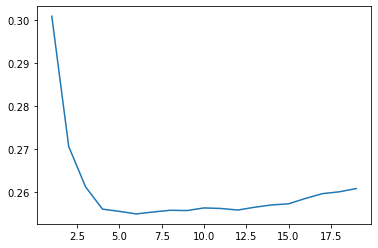

In [53]:
# Plot the mean_score to choose the best n_neighbors parameter
plt.plot(list(range(1,20)), mean_score)

In [54]:
# The n_neighbors = 10 gives the lowest mean cv score
knn = KNeighborsRegressor(n_neighbors=10)
score = cv_rmse(knn)
print("knn: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['knn'] = (score.mean(), score.std())

knn: 0.2564 (0.0214)


# Linear Regression (Without Panelty)

In [55]:
# Linear Regression without panelty
ols = LinearRegression()
score = cv_rmse(ols)
print("ols: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ols'] = (score.mean(), score.std())

ols: 0.1379 (0.0277)


# Ridge Regression

In [56]:
# Ridge Regression with a list of alpha
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

In [57]:
# Find the mean cv_rmse score with the best alpha
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.1283 (0.0242)


# Lasso

In [58]:
# Lasso Regression with a list of alpha
lasso_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=ridge_alphas, cv=kf))

In [59]:
# Find the mean cv_rmse score with the best alpha
score = cv_rmse(lasso)
print("lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lasso'] = (score.mean(), score.std())

lasso: 0.1253 (0.0244)


# Decision Tree

In [60]:
# Decision Tree Regressor
dtree = DecisionTreeRegressor(max_depth=5)
score = cv_rmse(dtree)
print("decision_tree: {:.4f} ({:.4f})".format(score.mean(), score.std()))

decision_tree: 0.1976 (0.0212)


In [61]:
# Tune the parameter of max_depth, search for max_depth that have lowest cv score
mean_score = []
for i in range(1,10):
    dtree = DecisionTreeRegressor(max_depth=i)
    score = cv_rmse(dtree)
    mean_score.append(score.mean())

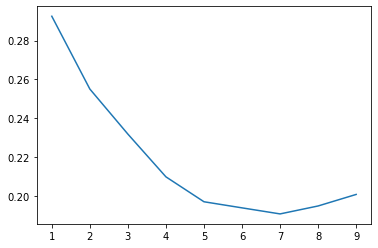

In [62]:
# Plot the mean_score to choose the best n_neighbors parameter
plt.plot(list(range(1,10)), mean_score)

In [63]:
# The max_depth = 8 gives the lowest mean cv score
dtree = DecisionTreeRegressor(max_depth = 8)
score = cv_rmse(dtree)
print("decision_tree: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['decision_tree'] = (score.mean(), score.std())

decision_tree: 0.2029 (0.0241)


In [64]:
#visualize the tree
dtree.fit(df_train2, df_train['SalePrice'])
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_7 <= 2.16
|   |--- feature_28 <= 13.05
|   |   |--- feature_22 <= 11.50
|   |   |   |--- feature_24 <= 0.50
|   |   |   |   |--- feature_58 <= 0.50
|   |   |   |   |   |--- feature_28 <= 12.40
|   |   |   |   |   |   |--- feature_42 <= -3.33
|   |   |   |   |   |   |   |--- feature_2 <= 18.03
|   |   |   |   |   |   |   |   |--- value: [10.80]
|   |   |   |   |   |   |   |--- feature_2 >  18.03
|   |   |   |   |   |   |   |   |--- value: [11.28]
|   |   |   |   |   |   |--- feature_42 >  -3.33
|   |   |   |   |   |   |   |--- feature_33 <= 0.37
|   |   |   |   |   |   |   |   |--- value: [11.07]
|   |   |   |   |   |   |   |--- feature_33 >  0.37
|   |   |   |   |   |   |   |   |--- value: [11.35]
|   |   |   |   |   |--- feature_28 >  12.40
|   |   |   |   |   |   |--- feature_178 <= 0.50
|   |   |   |   |   |   |   |--- feature_26 <= 10.18
|   |   |   |   |   |   |   |   |--- value: [11.78]
|   |   |   |   |   |   |   |--- feature_26 >  10.18
|   |   |   |   |   |   |   

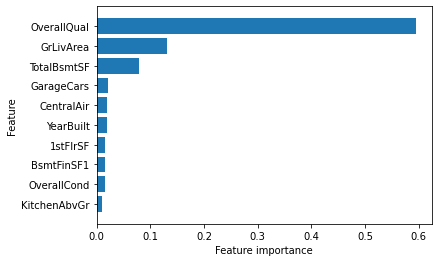

In [65]:
#plot the feature importance for the first 10 features.
def plot_feature_importances_tree(model):
    indices = dtree.feature_importances_.argsort()[-10:]
    n_features = len(indices)
    plt.barh(range(n_features), model.feature_importances_[indices], align='center')
    plt.yticks(np.arange(n_features), df_train2.columns[indices])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_tree(dtree)

# Random Forest

In [66]:
# Random Forest Regressor
rf = RandomForestRegressor()
score = cv_rmse(rf)
print("random_forest: {:.4f} ({:.4f})".format(score.mean(), score.std()))

random_forest: 0.1406 (0.0230)


In [67]:
# Tune the parameter of max_depth, search for max_depth that have lowest cv score
mean_score = []
for i in range(1,15):
    rf = RandomForestRegressor(max_depth=i)
    score = cv_rmse(rf)
    mean_score.append(score.mean())

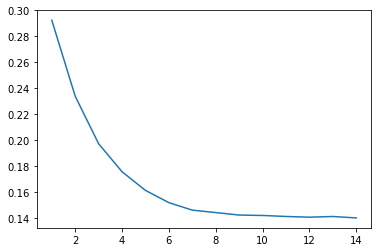

In [68]:
# Plot the mean_score to choose the best n_neighbors parameter
plt.plot(list(range(1,15)), mean_score)

In [69]:
# The max_depth = 15 gives the lowest mean cv score
rf = RandomForestRegressor(max_depth = 15)
score = cv_rmse(rf)
print("random_forest: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['random_forest'] = (score.mean(), score.std())

random_forest: 0.1410 (0.0231)


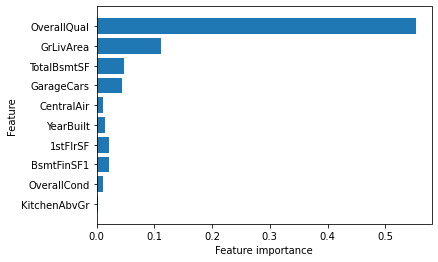

In [70]:
#plot the importance of the feautures in random forest
rf.fit(df_train2, df_train['SalePrice'])
plot_feature_importances_tree(rf)

# AdaBoost

In [71]:
# AdaBoost Regressor
adaboost = AdaBoostRegressor()
score = cv_rmse(adaboost)
print("adaboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))

adaboost: 0.1754 (0.0176)


In [72]:
# Check the learning rate that gives the lowest mean cv score
mean_score = []
for lr in [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5, 7, 10]:
    adaboost = AdaBoostRegressor(learning_rate = lr)
    score = cv_rmse(adaboost)
    mean_score.append(score.mean())

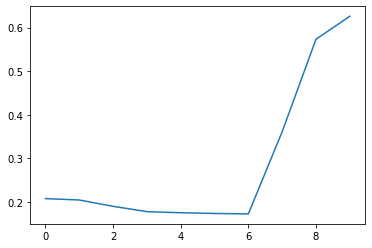

In [73]:
# Plot the mean_score to choose the best learning rate
plt.plot(list(range(10)), mean_score)

In [74]:
# The best learning rate is 3, so we add AdaBoost to the mean_score
adaboost = AdaBoostRegressor(learning_rate = 3)
score = cv_rmse(adaboost)
print("AdaBoost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['AdaBoost'] = (score.mean(), score.std())

AdaBoost: 0.1700 (0.0159)


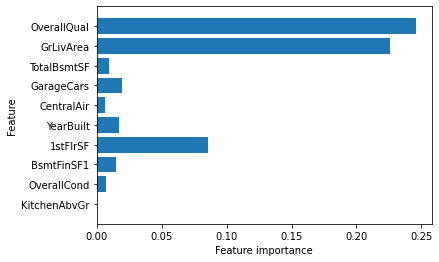

In [75]:
# Plot the importance of the feautures in random forest
adaboost.fit(df_train2, df_train['SalePrice'])
plot_feature_importances_tree(adaboost)

# Gradient Boost

In [76]:
# Gradient Boost Regressor
gboost = GradientBoostingRegressor()
score = cv_rmse(gboost)
print("gradient_boost: {:.4f} ({:.4f})".format(score.mean(), score.std()))

gradient_boost: 0.1275 (0.0203)


In [77]:
# Check the learning rate that gives the lowest mean cv score
mean_score = []
for lr in [0.05, 0.08, 0.1, 0.12, 0.14, 0.16, 0.2]:
    gboost = GradientBoostingRegressor(learning_rate = lr)
    score = cv_rmse(gboost)
    mean_score.append(score.mean())

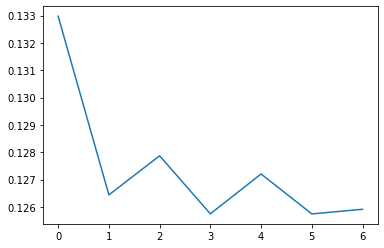

In [78]:
# Plot the mean_score to choose the best learning rate
plt.plot(list(range(7)), mean_score)

In [79]:
# The best learning rate is 0.16, so we add GradientBoostingRegressor to the mean_score
gboost = GradientBoostingRegressor(learning_rate = 0.16)
score = cv_rmse(gboost)
print("gradient_boost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gradient_boost'] = (score.mean(), score.std())

gradient_boost: 0.1272 (0.0210)


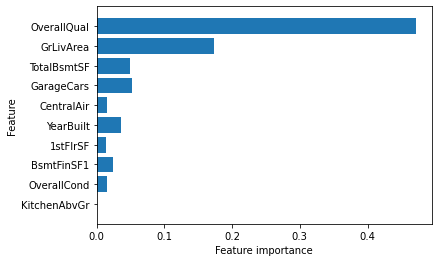

In [80]:
# Plot the importance of the feautures in random forest
gboost.fit(df_train2, df_train['SalePrice'])
plot_feature_importances_tree(gboost)

# XGBoost

In [81]:
# XGBoost Regressor
xgboost = XGBRegressor()
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))

xgboost: 0.1408 (0.0245)


In [82]:
# Check the learning rate that gives the lowest mean cv score
mean_score = []
for lr in [0.05, 0.08, 0.1, 0.12, 0.14, 0.16, 0.2]:
    xgboost = XGBRegressor(learning_rate = lr)
    score = cv_rmse(xgboost)
    mean_score.append(score.mean())

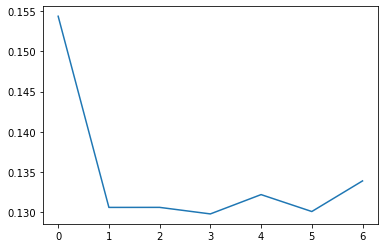

In [83]:
# Plot the mean_score to choose the best learning rate
plt.plot(list(range(7)), mean_score)

In [84]:
# The best learning rate is 0.16, so we add GradientBoostingRegressor to the mean_score
xgboost = XGBRegressor(learning_rate = 0.16)
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgboost'] = (score.mean(), score.std())

xgboost: 0.1301 (0.0232)


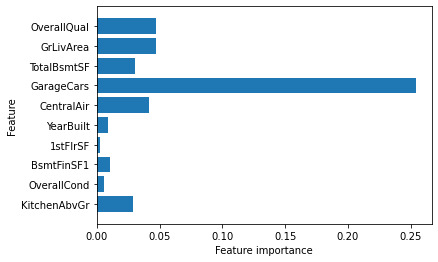

In [85]:
# Plot the importance of the feautures in random forest
xgboost.fit(df_train2, df_train['SalePrice'])
plot_feature_importances_tree(xgboost)

# LightGBM

In [86]:
# LightGBM Regressor
lgbm = LGBMRegressor()
score = cv_rmse(lgbm)
print("lgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))

lgbm: 0.1308 (0.0216)


In [87]:
# Check the learning rate that gives the lowest mean cv score
mean_score = []
for lr in [0.05, 0.08, 0.1, 0.12, 0.14, 0.16, 0.2]:
    lgbm = LGBMRegressor(learning_rate = lr)
    score = cv_rmse(lgbm)
    mean_score.append(score.mean())

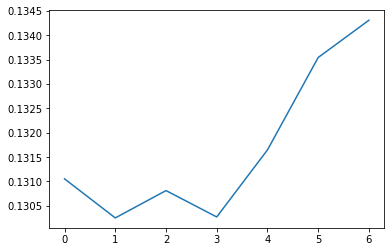

In [88]:
# Plot the mean_score to choose the best learning rate
plt.plot(list(range(7)), mean_score)

In [89]:
# The best learning rate is 0.14, so we add GradientBoostingRegressor to the mean_score
lgbm = LGBMRegressor(learning_rate = 0.14)
score = cv_rmse(lgbm)
print("lgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgbm'] = (score.mean(), score.std())

lgbm: 0.1316 (0.0203)


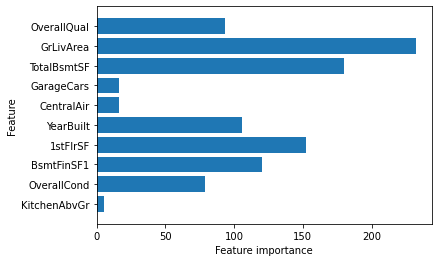

In [90]:
# Plot the importance of the feautures in random forest
lgbm.fit(df_train2, df_train['SalePrice'])
plot_feature_importances_tree(lgbm)

# Support Vector Regressor

In [91]:
# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.1309 (0.0287)


# Stacking Models

In [92]:
# Show the scores of each model
scores

{'knn': (0.2564255375635015, 0.021427569710740692),
 'ols': (0.1378817938722325, 0.02768171495622297),
 'ridge': (0.12831751418745777, 0.02415525372597325),
 'lasso': (0.12533243261887986, 0.024401978303057396),
 'decision_tree': (0.20289393811834358, 0.02414578227874438),
 'random_forest': (0.14097501518726385, 0.02305560993505178),
 'AdaBoost': (0.1699782770285459, 0.015936153676318707),
 'gradient_boost': (0.12723638090720088, 0.021020658114378),
 'xgboost': (0.13007268062253036, 0.02322019484198948),
 'lgbm': (0.13164648011477978, 0.02027251481196063),
 'svr': (0.13092212556590255, 0.028725887111936334)}

In [93]:
# Fit the models
knn.fit(df_train2, df_train['SalePrice'])
ols.fit(df_train2, df_train['SalePrice'])
ridge.fit(df_train2, df_train['SalePrice'])
lasso.fit(df_train2, df_train['SalePrice'])
dtree.fit(df_train2, df_train['SalePrice'])
rf.fit(df_train2, df_train['SalePrice'])
adaboost.fit(df_train2, df_train['SalePrice'])
gboost.fit(df_train2, df_train['SalePrice'])
xgboost.fit(df_train2, df_train['SalePrice'])
lgbm.fit(df_train2, df_train['SalePrice'])
svr.fit(df_train2, df_train['SalePrice'])

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('svr', SVR(C=20, epsilon=0.008, gamma=0.0003))])

In [94]:
# Stacking the models by giving higher weight to models with lower rmse
# Stack the ridge, lasso, gradient boost, xgboost, lightgbm, and svr
def stacked_predictions(df_train2):
    return ((0.2 * ridge.predict(df_train2)) + \
            (0.2 * lasso.predict(df_train2)) + \
            (0.3 * gboost.predict(df_train2)) + \
            (0.1 * xgboost.predict(df_train2)) + \
            (0.1 * lgbm.predict(df_train2)) + \
            (0.1 * svr.predict(df_train2)))

In [95]:
# Define the error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [96]:
rmsle(df_train['SalePrice'], stacked_predictions(df_train2))

0.07446385494141768

# Submission

In [97]:
# Since the stacked regression gives the best prediction, we shall use the stacked regression to submit results
# Read in sample_submission dataframe
submission = pd.read_csv("./input/sample_submission.csv")
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [98]:
# Append predictions from blended models
submission.iloc[:,1] = np.exp(stacked_predictions(df_test2))
submission

,Id,SalePrice
0,1461,118578.564755
1,1462,157677.568176
2,1463,182039.533236
3,1464,192828.891585
4,1465,195161.951772
...,...,...
1454,2915,82728.508668
1455,2916,81781.333331
1456,2917,163153.653299
1457,2918,122161.807707


In [99]:
submission.to_csv("final_submission.csv", index=False)